## in this notebook we discuss two task: KNN classification task and a regressin task

In [30]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,  PredefinedSplit
from sklearn.linear_model import SGDRegressor #for stochastic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge #batch
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
import matplotlib.pyplot as plt

# Path to a file in Google Drive
data = pd.read_csv('https://drive.google.com/uc?id=1nqSQ-M_Ff2TDD2U0syAbFBvJZuXJLWNc')
#data=pd.read_csv('California_Houses.csv')

# **Basic Concepts**
#what is regression?
##in a regression problem a model tries to predict the output of some function.

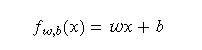
*   f(x) is the dependent variable we want to predict.
*   X is the independent variable we use to make the prediction.
* b is the
y-intercept and w is the slope of the line.


#### these parameteres should minimize some set cost function **J** for linear regression we will use the sum of squared error cost function.

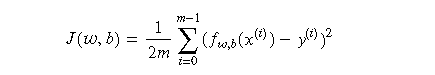

##Gradient Descent
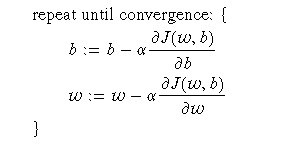



# **California Houses Problem**
#### in this problem we use linear regression to predict the median house price given a set of samples and corresponding features.

#split the trainging data into training , test , and validation sets

In [31]:
#visiualize the rwa data
# Display the column headers
print(data.columns)
# Inspect the data (this helps verify if there are missing values or other issues)
print(data.info())
print(data.describe())

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-

'Median_House_Value' is the value we want to predict. the rest are feetures.

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define feature columns
X_features = [
    'Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
    'Population', 'Households', 'Latitude', 'Longitude',
    'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
    'Distance_to_SanJose', 'Distance_to_SanFrancisco'
]

# Arrange data and split
X = data[X_features]  # Feature matrix
y = data['Median_House_Value']  # Target variable

# Transform to numpy arrays
X = X.to_numpy()  # or use X.values
y = np.array(y)

# Normalize the data for comparison later on
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Split the data into 70% training, 15% test, and 15% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Split the normalized set as well
Xnorm_train, Xnorm_temp = train_test_split(X_norm, test_size=0.3, random_state=42)
Xnorm_val, Xnorm_test = train_test_split(Xnorm_temp, test_size=0.5, random_state=42)

# Visualize the data
print(f"The features of the first sample are: {X_train[1]}")
print(f"The median price is: {y_train[1]}\n")

print(f"The features of the first sample from the normalized set are: {Xnorm_train[1]}")
print(f"The median price is: {y_train[1]}")


The features of the first sample are: [ 2.86310000e+00  2.00000000e+01  2.18300000e+03  5.34000000e+02
  9.99000000e+02  4.96000000e+02  3.27900000e+01 -1.17090000e+02
  1.43449263e+04  1.76528653e+05  1.06011336e+04  6.68041340e+05
  7.36046140e+05]
The median price is: 169700.0

The features of the first sample from the normalized set are: [-0.53036314 -0.68647699 -0.20754074 -0.00925371 -0.37660163 -0.00925841
 -1.33052136  1.23769666 -0.5324573  -0.3749835  -1.33922748  1.46839372
  1.39678202]
The median price is: 169700.0


## we are going to use four very similar models: Linear, Ridge, and Lasso the Linear model is the basic Model we discussed earlier where f(x)= wx +b. the ridge and lasso models are derived from this model by adding a regularization term. the SGDR (stochastic)model uses gradient descent iteratively and not as batch.  

## for the stochastic ghradient descent we will be using the normalized data sets

In [33]:

# Initialize models
sgdr = SGDRegressor(max_iter=2000)
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=1)

# train and evaluate sgdr
sgdr.fit(Xnorm_train, y_train)
y_pred_sgdr=sgdr.predict(Xnorm_val)
mse_sgdr = mean_squared_error(y_val, y_pred_sgdr)
mae_sgdr = mean_absolute_error(y_val,y_pred_sgdr)

# Train and evaluate Linear Regression
linear_model.fit(Xnorm_train, y_train)
y_pred_linear = linear_model.predict(Xnorm_val)
mse_linear = mean_squared_error(y_val, y_pred_linear)
mae_linear = mean_absolute_error(y_val, y_pred_linear)

# Train and evaluate Lasso Regression
lasso_model.fit(Xnorm_train, y_train)
y_pred_lasso = lasso_model.predict(Xnorm_val)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)

# Train and evaluate Ridge Regression
ridge_model.fit(Xnorm_train, y_train)
y_pred_ridge = ridge_model.predict(Xnorm_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)

a:\pycharm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+13, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(


In [34]:
# Print the results
print("SGDR:")
print("MSE:", mse_sgdr)
print("MAE:", mae_sgdr)

print("\nLinear Regression:")
print("MSE:", mse_linear)
print("MAE:", mae_linear)

print("\nLasso Regression:")
print("MSE:", mse_lasso)
print("MAE:", mae_lasso)
print("Selected features:", sum(lasso_model.coef_ != 0))

print("\nRidge Regression:")
print("MSE:", mse_ridge)
print("MAE:", mae_ridge)


SGDR:
MSE: 4944486903.294801
MAE: 51321.86075195924

Linear Regression:
MSE: 4907211997.374781
MAE: 50790.060271050934

Lasso Regression:
MSE: 4907209875.578146
MAE: 50790.1825237019
Selected features: 13

Ridge Regression:
MSE: 4907280799.676526
MAE: 50793.60758762655


 # Behind the code
 ## what exactly are the regularization factors in the Lasso and Ridge regressions

 ## 1 lasso regression
 #### the lasso regression( also known as the L1 regression) adds a "penalty" term to the cost function so that the cost function becomes :
 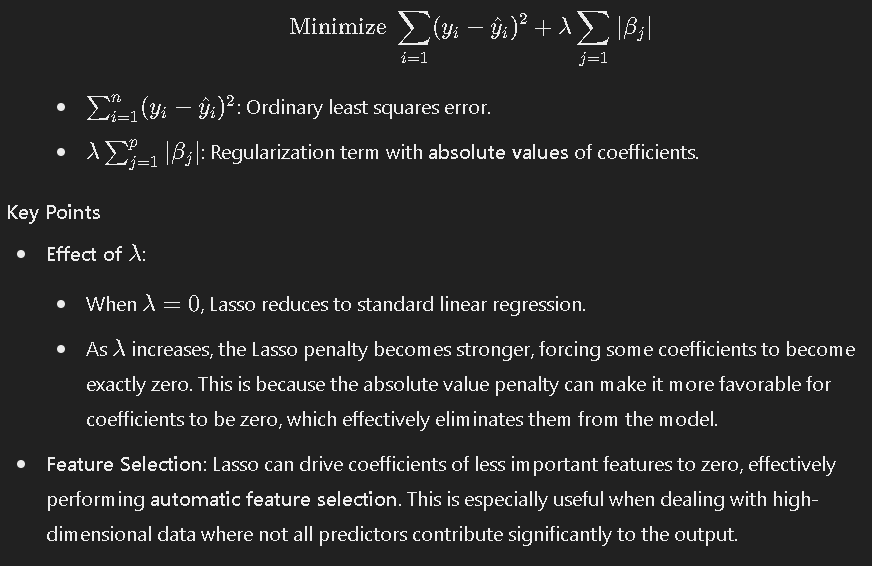

## 2 Ridge Regression

### ridge regression(also known as L2 regularization) adds a penalty based on the square of the magnitude of the coeeficients so that the cost function becomes: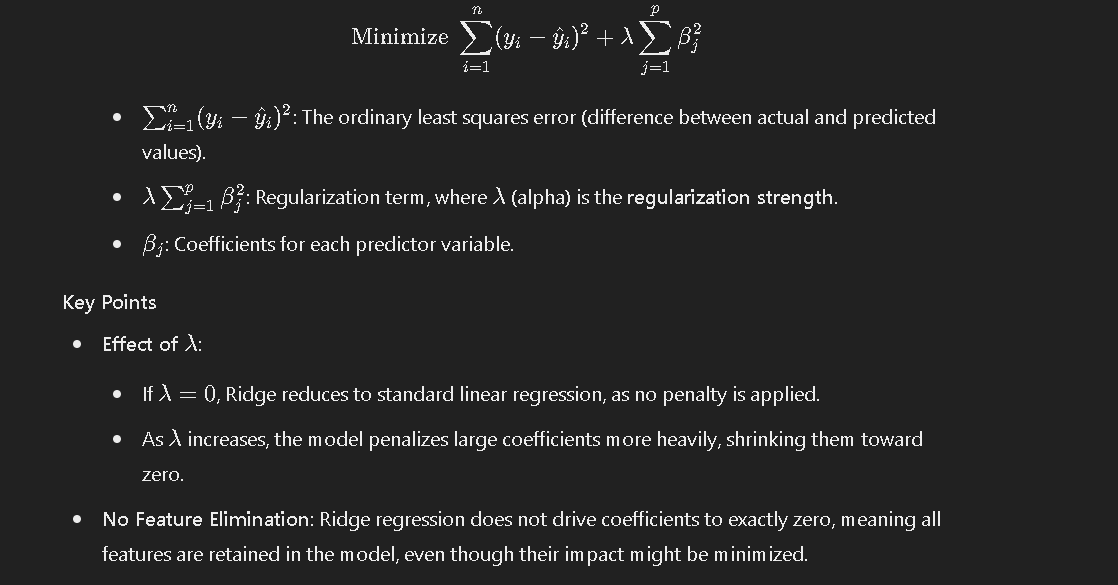

###note that the ridge regression minimizes but does not eliminate features unlike the ridge function due to the diffrentiable nature of the ridge cost function.

## but why do we need regularization?
  * to prevent overfitting
  * handling high dimensional data
  * simplifying the model as rdge regression can remove some coefficients to zero
  * reducing variance hence leading to improved better generalization
#what now?
### now we will attempt to tune the lambda parameters so that it gives reduced error

In [35]:
import numpy as np
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Define a range for alpha
alpha_range = np.logspace(-4, 2, 10)

# Create scorers for MAE and MSE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # MAE scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)    # MSE scorer

# Combine the training and validation sets
X_combined = np.concatenate([Xnorm_train, Xnorm_val])
y_combined = np.concatenate([y_train, y_val])

# Define the parameter grid using alpha_range
param_grid = {'alpha': alpha_range}

# Initialize models
model_lasso = Lasso(max_iter=10000)
model_ridge = Ridge(max_iter=10000)

# Initialize GridSearchCV for Ridge and Lasso regression with multiple scorers
grid_search_ridge = GridSearchCV(model_ridge, param_grid, scoring={'MSE': mse_scorer, 'MAE': mae_scorer}, cv=5, refit='MSE')
grid_search_lasso = GridSearchCV(model_lasso, param_grid, scoring={'MSE': mse_scorer, 'MAE': mae_scorer}, cv=5, refit='MSE')

# Fit using the combined dataset
grid_search_ridge.fit(X_combined, y_combined)
grid_search_lasso.fit(X_combined, y_combined)

# Best score and best parameters for Ridge
print("Ridge Regression:")
print("Best score (MSE):", -grid_search_ridge.best_score_)  # Negate to show as positive
print("Best parameters:", grid_search_ridge.best_params_)
print("Best MAE score:", -grid_search_ridge.cv_results_['mean_test_MAE'][grid_search_ridge.best_index_])  # Negate to show as positive

# Best score and best parameters for Lasso
print("\nLasso Regression:")
print("Best score (MSE):", -grid_search_lasso.best_score_)  # Negate to show as positive
print("Best parameters:", grid_search_lasso.best_params_)
print("Best MAE score:", -grid_search_lasso.cv_results_['mean_test_MAE'][grid_search_lasso.best_index_])  # Negate to show as positive

Ridge Regression:
Best score (MSE): 4781613598.9626045
Best parameters: {'alpha': 1.0}
Best MAE score: 50188.20397156067

Lasso Regression:
Best score (MSE): 4781651958.2599125
Best parameters: {'alpha': 1.0}
Best MAE score: 50185.6559227573


## note that the results are somewhat different from previuosly manually setting the alpha. and if you set the alpha to 1 you are going to get different MSE and MAE this is due to the different splitting of the data.

##finally we validate our findings using the reserved test set.

In [36]:
#retrain the model with the parametr that scored best
best_ridge_model = grid_search_ridge.best_estimator_
best_lasso_model = grid_search_lasso.best_estimator_

# Make predictions on the test set
y_pred_ridge = best_ridge_model.predict(Xnorm_test)
y_pred_lasso = best_lasso_model.predict(Xnorm_test)

# Evaluate the Ridge model on the test set
print("Ridge Regression Test Set Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))

# Evaluate the Lasso model on the test set
print("\nLasso Regression Test Set Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))

Ridge Regression Test Set Evaluation:
MAE: 48843.499421533605
MSE: 4400559506.958959
R²: 0.6672067741176397

Lasso Regression Test Set Evaluation:
MAE: 48842.4855286273
MSE: 4400791925.797452
R²: 0.667189197394749


Scatter plots for Linear Regression


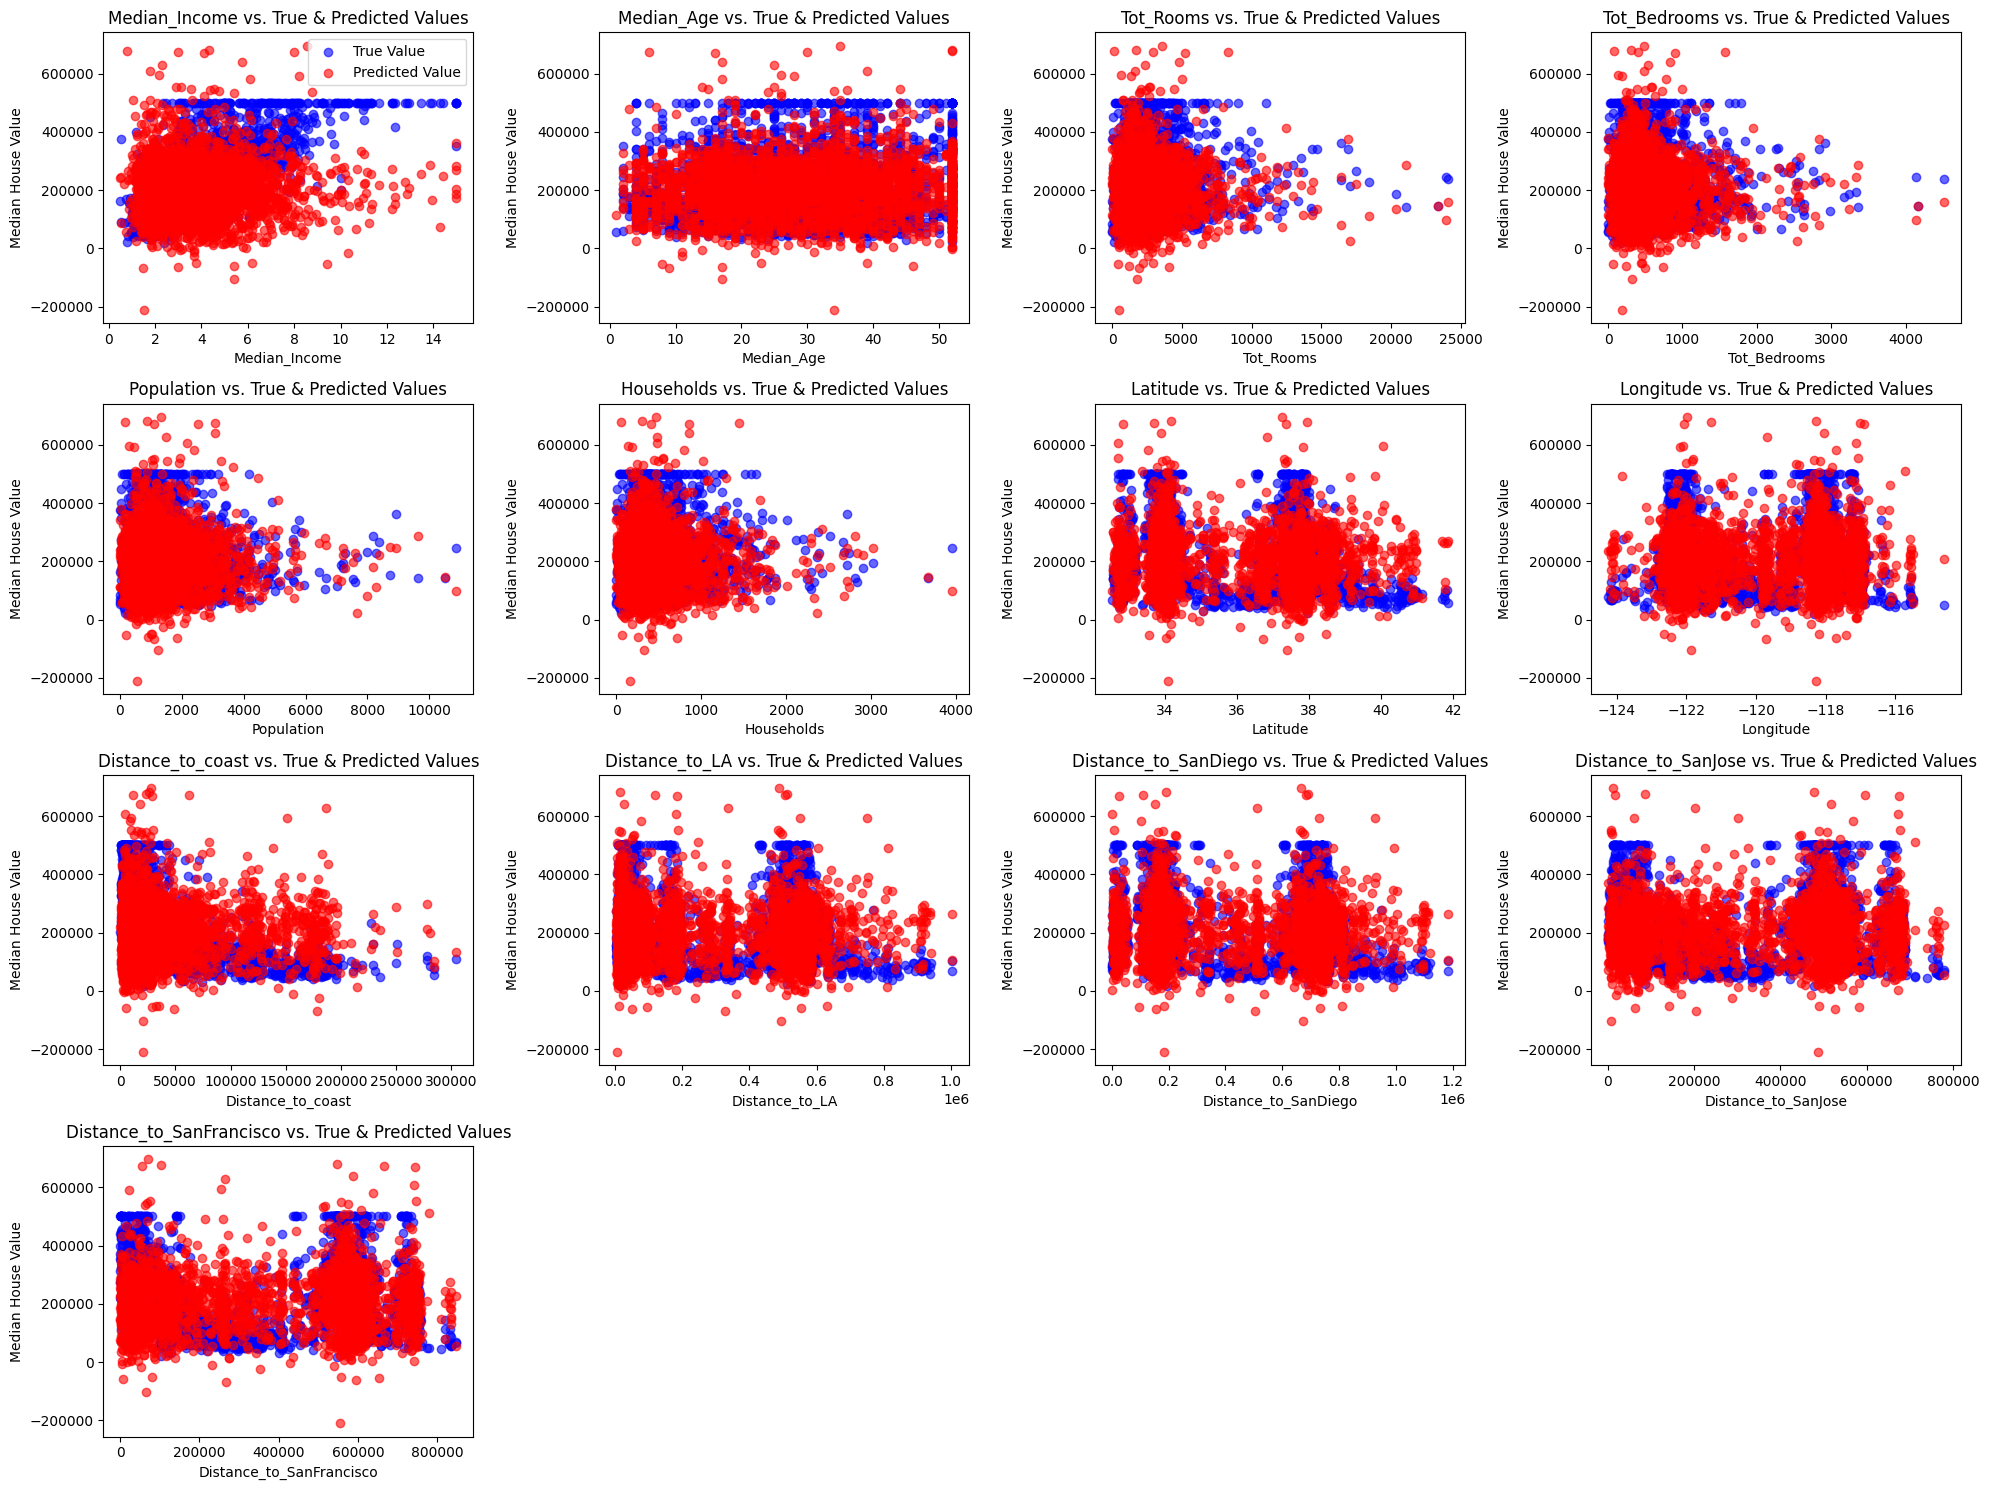

Scatter plots for Lasso Regression


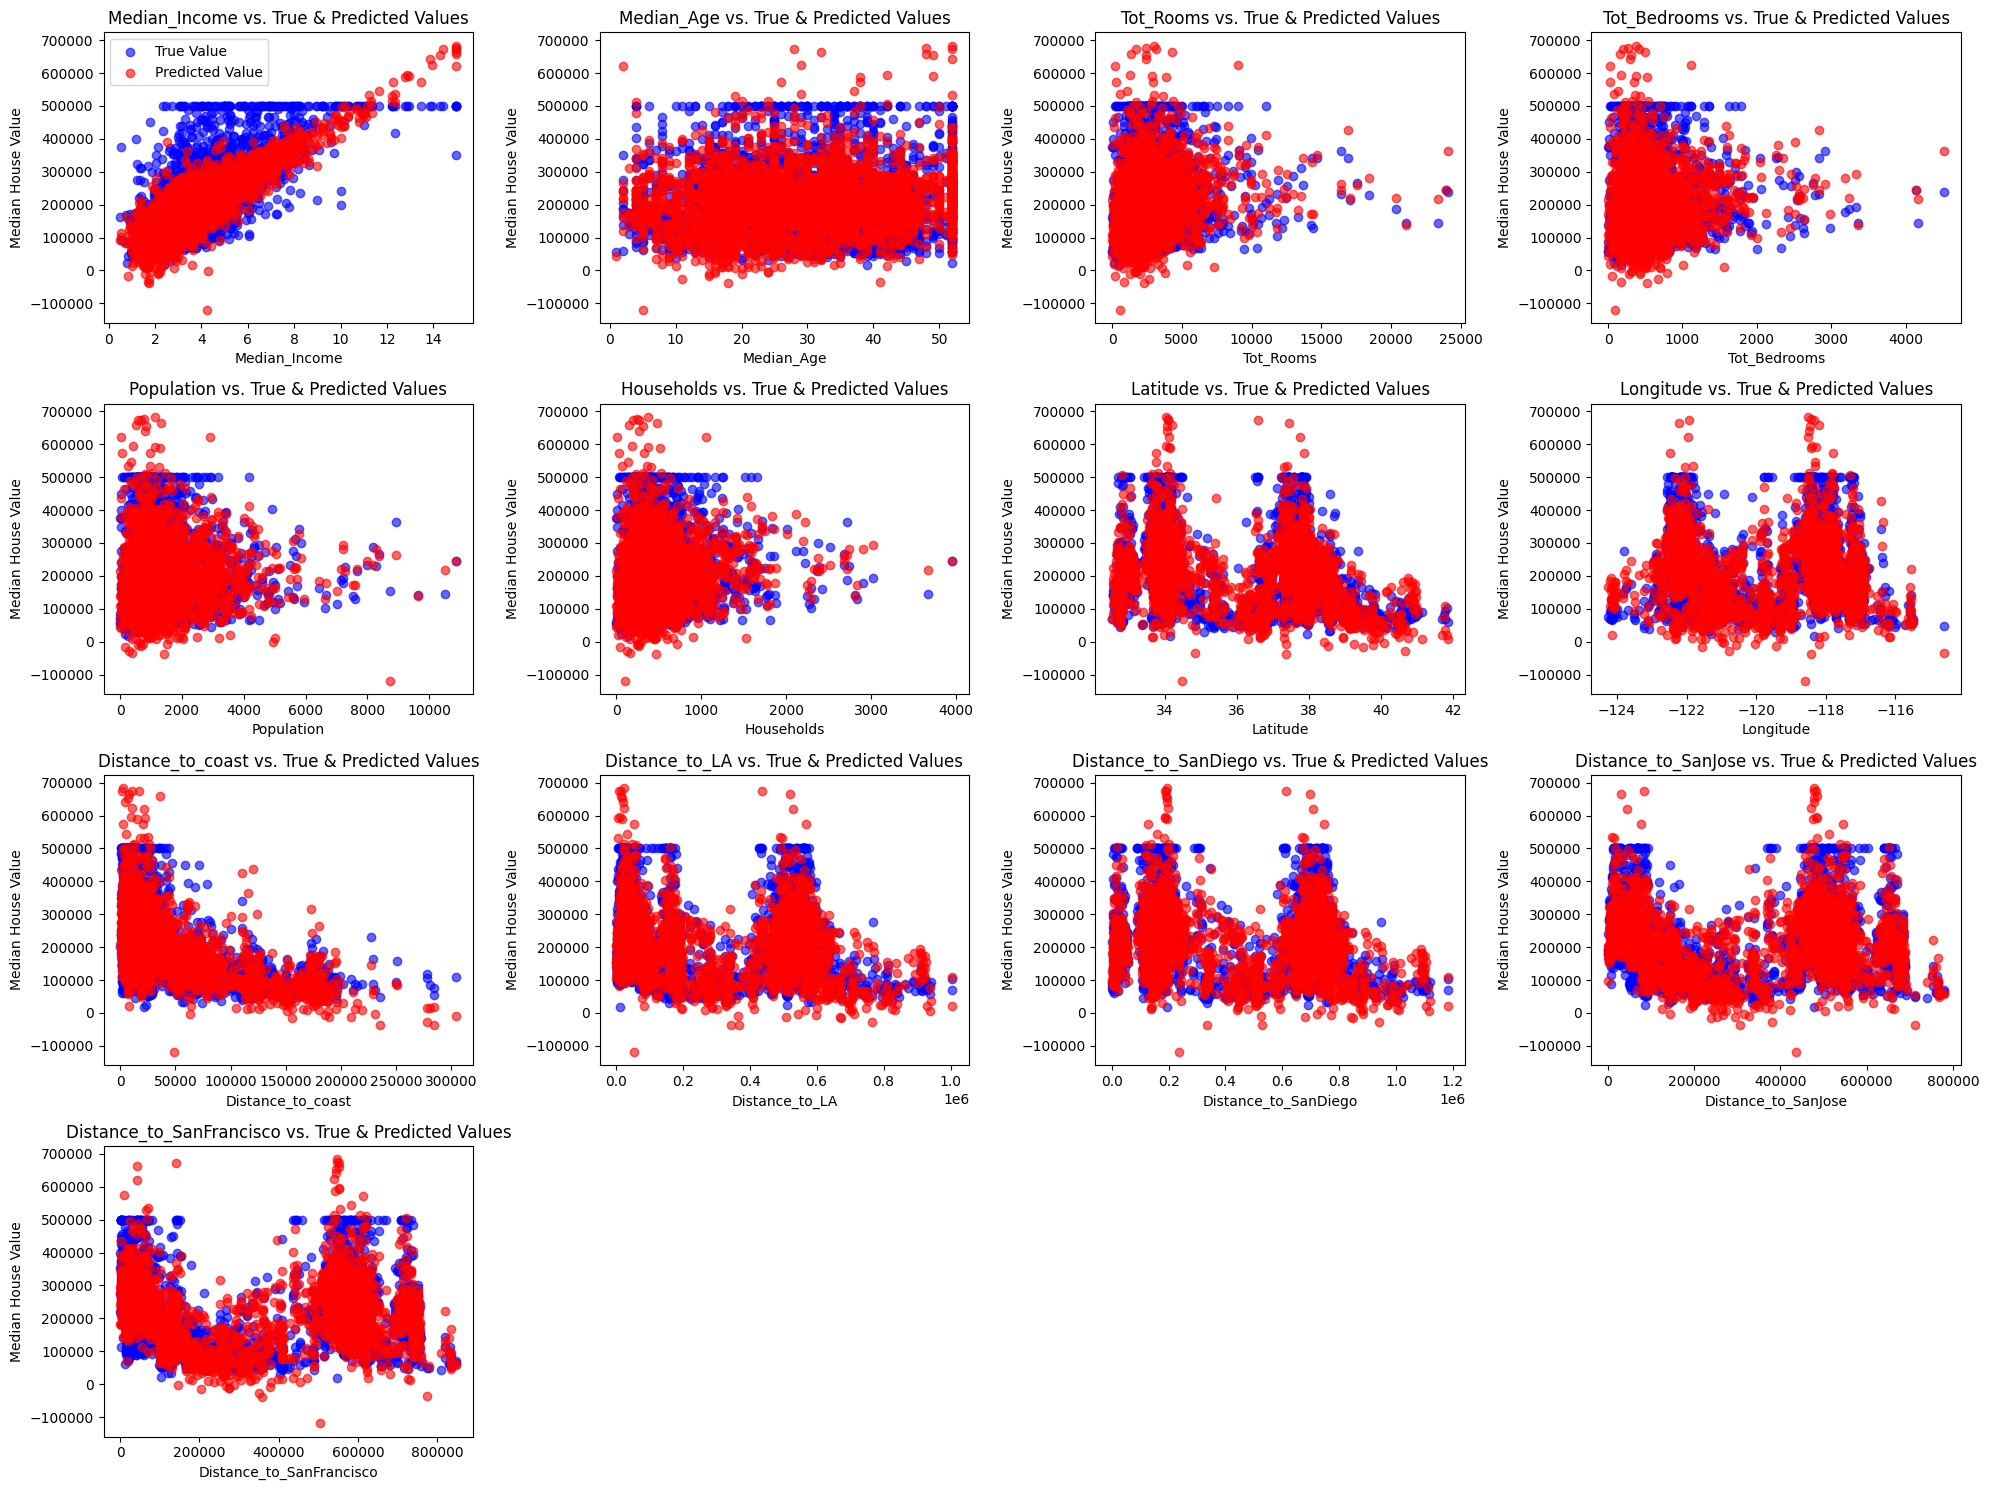

Scatter plots for Ridge Regression


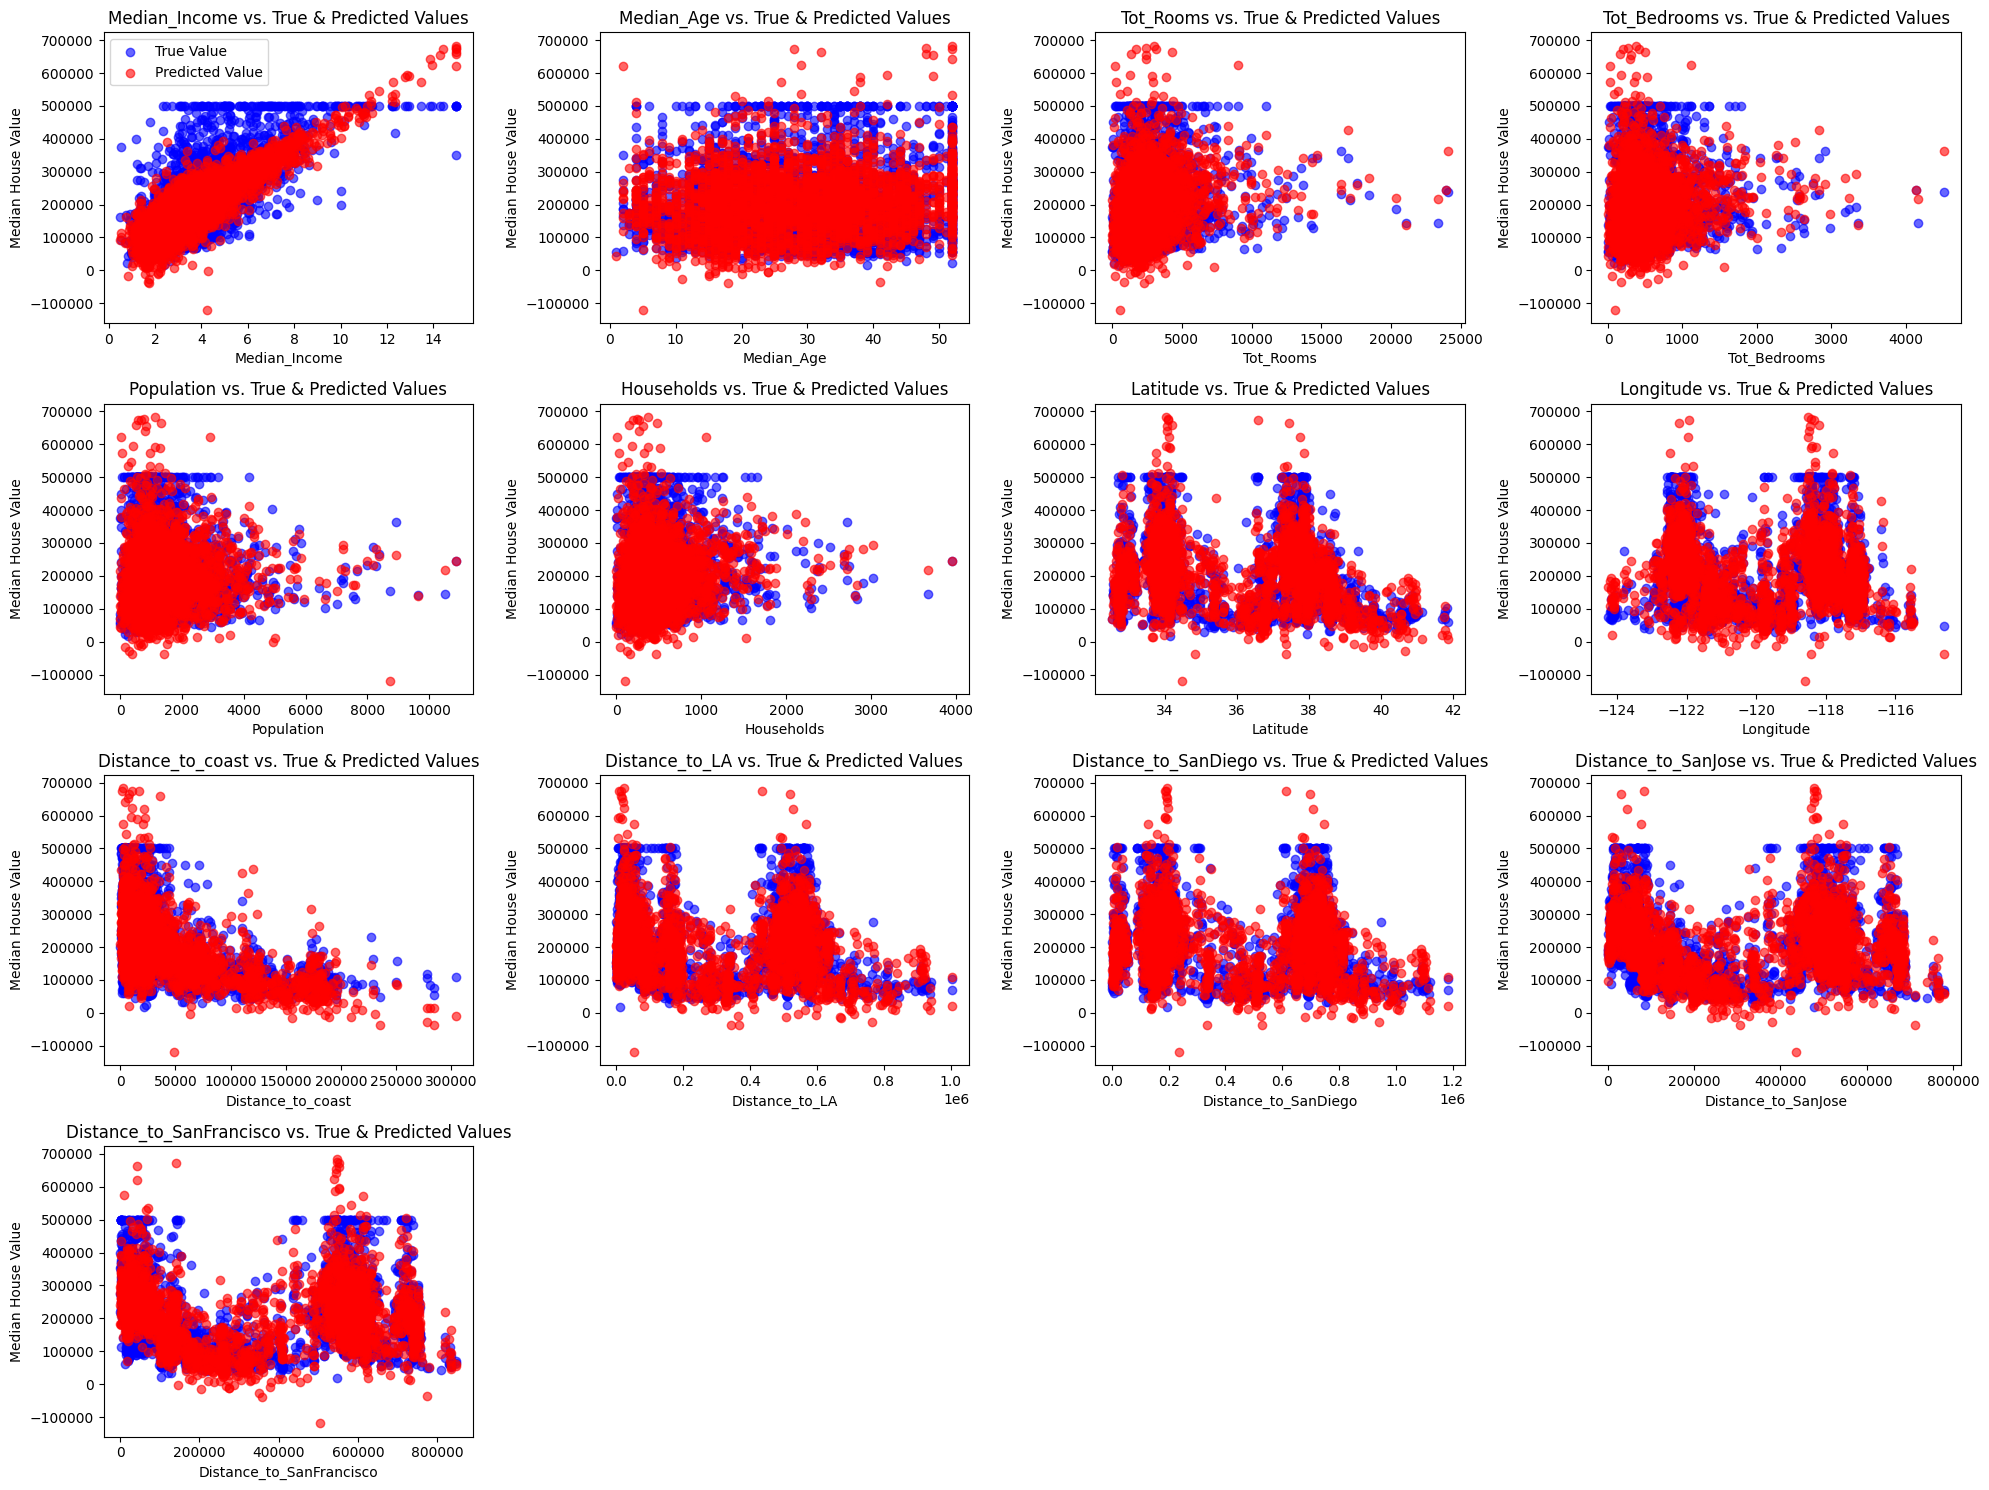

In [37]:

# Scatter plots for each feature
features = X_features  # List of feature names
models = {'Linear Regression': y_pred_linear, 'Lasso Regression': y_pred_lasso, 'Ridge Regression': y_pred_ridge}

for model_name, y_pred in models.items():
    print(f"Scatter plots for {model_name}")
    plt.figure(figsize=(20, 15))
    
    for idx, feature in enumerate(features, 1):
        plt.subplot(4, 4, idx)
        plt.scatter(X_test[:, idx-1], y_test, color='blue', label='True Value', alpha=0.6)
        plt.scatter(X_test[:, idx-1], y_pred, color='red', label='Predicted Value', alpha=0.6)
        plt.xlabel(feature)
        plt.ylabel('Median House Value')
        plt.title(f"{feature} vs. True & Predicted Values")
        if idx == 1:
            plt.legend()
    
    plt.tight_layout()
    plt.show()


# **Classification Problem**

in this problem we use KNN to differentiate between two classes

In [38]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [39]:

#initialize variables to hold data#
class_g=[]
class_h=[]


we know that the number of samples for both classes is not the same so we have to balance out the number of samples after separating the data.

In [40]:

#read the data#
with open('data.txt','r') as file:   #alternatively we can use np.genfromtxt()...prefered to do it manually for practice
    for line in file:
        values=line.strip().split(',')
        data = list(map(float, values[:-1])) #converting to integers for later processing
        if values[-1]=='g':
            class_g.append(data + [1]) #class gamma label
        else:
            class_h.append(data + [0]) #class hedron label

In [41]:
#find the imbalance #
len_g=len(class_g)
len_h=len(class_h)
diff=len_g-len_h
print(f"the length of class g is {len_g}")
print(f"the length of class h is {len_h}")
print(f"we need to set aside {diff} random examples from class g to balance the data")

#fixing the imbalance#
np. random.seed(70) # generate a seed for reproducibility of results (hn5tar random) 
index_of_putaside = np.random.choice(len_g, diff, replace=False)  # Select 'diff' unique random indices
print(index_of_putaside[0:4])
downsized_g=[item for i,item in enumerate(class_g) if i not in index_of_putaside] #downsized to elements not in the putaside array
print(len(downsized_g))

#convert to numpy array for proper utilization
gamma=np.array(downsized_g)
hedron=np.array(class_h)
full_data=np.concatenate((gamma,hedron),axis=0)

#visiuallize the data#
print(f"the first three isntances of each matrix gamma features:\n{gamma[:3]}\n hedron:\n{hedron[:3]}")



the length of class g is 12332
the length of class h is 6688
we need to set aside 5644 random examples from class g to balance the data
[7198 5785 1665 9586]
6688
the first three isntances of each matrix gamma features:
[[ 7.51362e+01  3.09205e+01  3.16110e+00  3.16800e-01  1.83200e-01
  -5.52770e+00  2.85525e+01  2.18393e+01  4.64800e+00  3.56462e+02
   1.00000e+00]
 [ 4.82468e+01  1.73565e+01  3.03320e+00  2.52900e-01  1.51500e-01
   8.57300e+00  3.80957e+01  1.05868e+01  4.79200e+00  2.19087e+02
   1.00000e+00]
 [ 1.88562e+01  1.64600e+01  2.43850e+00  5.28200e-01  2.93300e-01
   2.51269e+01 -6.54010e+00 -1.69327e+01  1.14610e+01  1.62848e+02
   1.00000e+00]]
 hedron:
[[ 9.370350e+01  3.794320e+01  3.145400e+00  1.680000e-01  1.011000e-01
   5.325660e+01  8.905660e+01  1.181750e+01  1.412240e+01  2.319028e+02
   0.000000e+00]
 [ 1.020005e+02  2.200170e+01  3.316100e+00  1.064000e-01  7.240000e-02
  -5.408620e+01  4.305530e+01 -1.506470e+01  8.846360e+01  2.749392e+02
   0.000000e+00

In [42]:
#split the data into  70% training, 15% test, 15% training      #alternatively np.split()
np.random.shuffle(full_data)

training_set_index=int(0.7*len(full_data))
test_set_index=int(0.15*len(full_data)) +training_set_index

training_set=full_data[0:training_set_index]
test_set=full_data[training_set_index:test_set_index]
validation_set=full_data[test_set_index:]

# Prepare features and labels for training and testing
X_train = training_set[:, :-1]  # Features (all columns except the last)
y_train = training_set[:, -1]   # Labels (last column)

X_test = test_set[:, :-1]  # Features for test set
y_test = test_set[:, -1]   # Labels for test set

X_validation = validation_set[:, :-1]  # Features (all columns except the last)
y_validation = validation_set[:, -1]   # Labels (last column)



# what is a Confusion Matrix
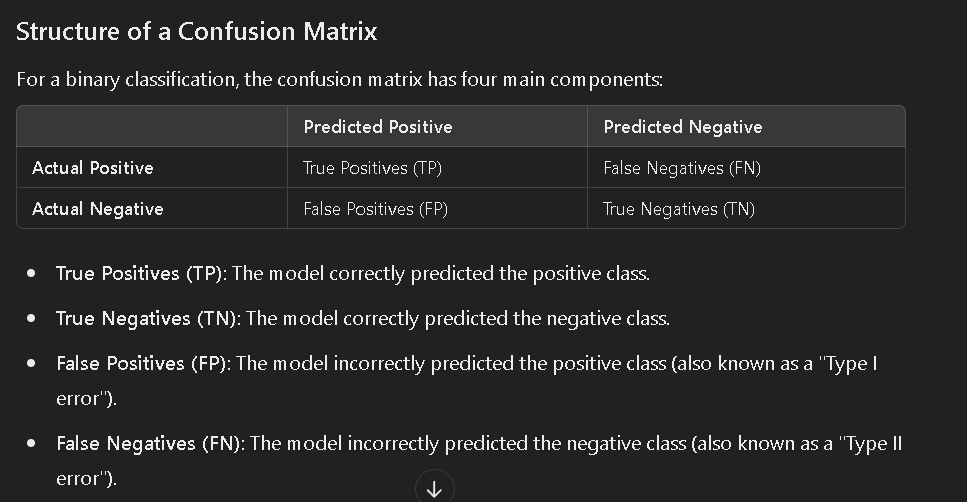

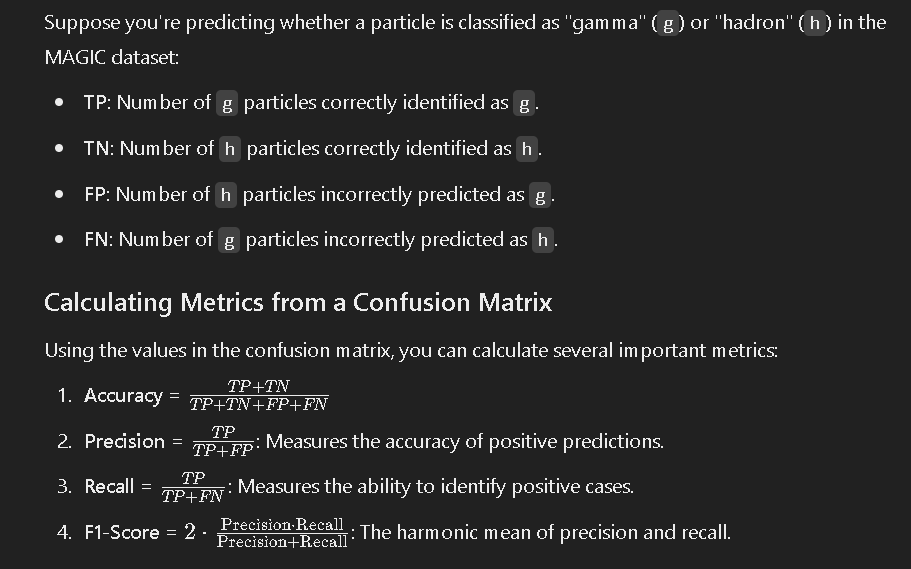

the best k index is 27


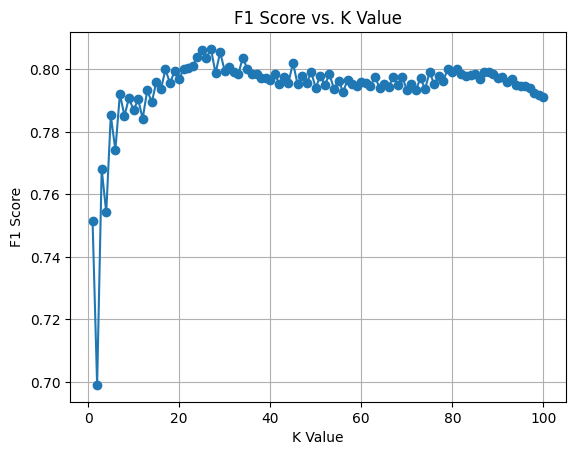

Test Set Performance Metrics:
Accuracy: 0.7648231190832088
Precision: 0.7217741935483871
Recall: 0.87573385518591
F1 Score: [0.7514285714285714, 0.6990185387131952, 0.7680821278581428, 0.7542457542457542, 0.7852873563218391, 0.7741935483870968, 0.7921245421245421, 0.7851357789423535, 0.7909502262443439, 0.7868852459016393, 0.7904461469130238, 0.7842227378190255, 0.7933363349842414, 0.7894493290143452, 0.7960378208014408, 0.7935779816513762, 0.8, 0.7955801104972375, 0.7994604316546763, 0.7968892955169259, 0.8001792114695341, 0.8005464480874317, 0.8012533572068039, 0.8040018190086403, 0.80625, 0.8037974683544303, 0.8065661047027507, 0.7987364620938628, 0.8054940186087727, 0.7996398018910401, 0.8008869179600887, 0.7992783040144339, 0.7985739750445633, 0.803788903924222, 0.8, 0.7983798379837984, 0.7985803016858918, 0.7973033707865168, 0.797153024911032, 0.7967625899280576, 0.7983978638184246, 0.7954954954954955, 0.7976827094474154, 0.7956795679567957, 0.802134281903068, 0.7953321364452424,

In [43]:
# Apply KNN
f1=[]
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors
    knn.fit(X_train, y_train)  # Train the model
    y_pred_val = knn.predict(X_validation)
    
    # Calculate additional metrics for the validation set
    accuracy = accuracy_score(y_validation, y_pred_val)
    precision = precision_score(y_validation, y_pred_val)
    recall = recall_score(y_validation, y_pred_val)
    cm=confusion_matrix(y_validation,y_pred_val)
    f1.append(f1_score(y_validation, y_pred_val))

best_k_value=f1.index(max(f1))+1
print(f"the best k index is {best_k_value}")

# Visualization of F1 scores
plt.plot(range(1,101), f1, marker='o')
plt.title('F1 Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.grid()
plt.show()

# Print out the results
print(f"Test Set Performance Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")

we finally use the reserved test set.

In [44]:
#verify using the test set
knn_final=KNeighborsClassifier(n_neighbors=best_k_value)
knn_final.fit(X_train,y_train)
y_pred_test=knn_final.predict(X_test)

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
cm_test = confusion_matrix(y_test, y_pred_test)

# Print out the results
print(f"Test Set Performance Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Confusion Matrix:\n{cm_test}")

Test Set Performance Metrics:
Accuracy: 0.7587
Precision: 0.7645
Recall: 0.7587
F1 Score: 0.7569
Confusion Matrix:
[[666 320]
 [164 856]]
